In [1]:
from sklearn.experimental import enable_iterative_imputer
from dataops import DataOps

In [2]:
do = DataOps(
    temporal_folder="/Users/ignasi/Documents/_03_MDS_/_01_ADSDB_/data/landing/temporal",
    persistent_folder="/Users/ignasi/Documents/_03_MDS_/_01_ADSDB_/data/landing/persistent",
)

In [4]:
do.execute_pipeline()

Starting full pipeline execution...
Executing landing phase...
Executing Landing in landing phase
Landing phase completed.
Executing formatted phase...
Executing CSVFormatted in formatted phase
Executing JSONFormatted in formatted phase
Formatted phase completed.
Executing trusted phase...
Executing MVCPersonTrusted in trusted phase


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x104309a10>>
Traceback (most recent call last):
  File "/Users/ignasi/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
KeyboardInterrupt: 

KeyboardInterrupt



In [ ]:
do.pipeline.connectors["formatted_connector"].get_tables()

In [ ]:
do.pipeline.connectors["formatted_connector"].get_table_as_dataframe(
    "motorvehiclecollisions_person_2023"
)

In [7]:
do.pipeline.execute_stage("analytical_sandbox")

Executing analytical_sandbox phase...
Executing AccidentAnalyticalSandbox in analytical_sandbox phase
Table safety_rating_by_accidents created successfully.
Executing BrandsAnalyticalSandbox in analytical_sandbox phase
Table mvc_safety_rating_by_brand created successfully.
Analytical_sandbox phase completed.


Executing feature_engineering phase...
Executing AccidentFeatureEngineering in feature_engineering phase
Table safety_rating_by_accidents_train created successfully.
Table safety_rating_by_accidents_test created successfully.
Executing BrandsFeatureEngineering in feature_engineering phase
Table mvc_safety_rating_by_brand_train created successfully.
Table mvc_safety_rating_by_brand_test created successfully.
Feature_engineering phase completed.


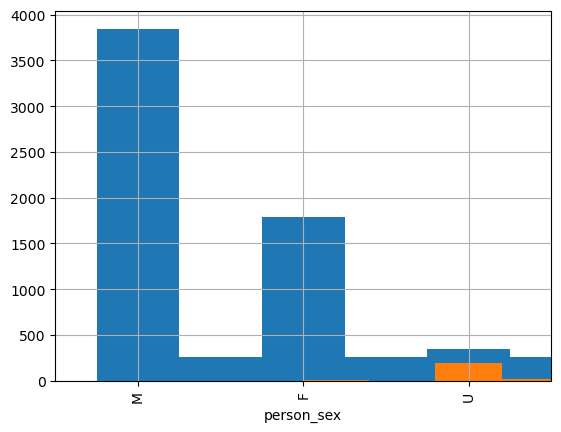

In [3]:
do.pipeline.execute_stage("feature_engineering")

In [4]:
do.pipeline._train_models()

In [5]:
do.pipeline._validate_models()

/Users/ignasi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'accident': {'mean_absolute_error': 0.5214027929430352,
  'mean_squared_error': 0.5077409626637149,
  'root_mean_squared_error': 0.7125594450035133,
  'r2_score': 0.08603586956606768},
 'brand': {'macro': 0.9124423963133641,
  'micro': 0.9473684210526315,
  'weighted': 0.9502789231142371,
  'raw': array([0.85714286, 0.96774194]),
  'confusion_matrix': array([[ 3,  0],
         [ 1, 15]])}}

In [6]:
df = do.pipeline.connectors["feature_engineering_connector"].get_table_as_dataframe(
    "safety_rating_by_accidents_test"
)

In [7]:
df.columns

Index(['F', 'M', 'U', 'person_age', 'overall_rating', 'vehicle_age', 'make_0',
       'make_1', 'make_2', 'make_3', 'make_4', 'make_5', 'make_6', 'make_7',
       'make_8', 'make_9'],
      dtype='object')